In [762]:
import statsmodels.api as sm
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px

In [763]:
df = pd.read_csv("E:\\Dessertation\\desertion_dkit_msc_2022_sep\\suicide_master.csv")
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Thailand,2016,female,75+ years,69,1589015,4.34,Thailand2016,NaN,4.120000e+11,6713,Silent
27816,Thailand,2016,female,55-74 years,222,6049756,3.67,Thailand2016,NaN,4.120000e+11,6713,Boomers
27817,Thailand,2016,female,35-54 years,375,10629684,3.53,Thailand2016,NaN,4.120000e+11,6713,Generation X
27818,Thailand,2016,female,25-34 years,116,4702656,2.47,Thailand2016,NaN,4.120000e+11,6713,Millenials
27819,Thailand,2016,female,15-24 years,60,4525574,1.33,Thailand2016,NaN,4.120000e+11,6713,Millenials


In [764]:
# remove special character
df.columns = df.columns.str.replace(' ', '')

In [765]:
df.columns = map(str.lower, df.columns)

In [766]:
df.rename( {'gdp_for_year($)':'yearly_gdp' } , axis=1 , inplace = True)
df.rename( {'gdp_per_capita($)':'gdp_per_capita' } , axis=1 , inplace = True)
df.rename( {'hdiforyear':'yearly_hdi' } , axis=1 , inplace = True)
df.rename( {'suicides/100kpop':'sucid_in_hundredk' } , axis=1 , inplace = True)
df.rename( {'suicides_no':'suicides' } , axis=1 , inplace = True)

In [767]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides           27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   sucid_in_hundredk  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   yearly_hdi         8364 non-null   float64
 9   yearly_gdp         27820 non-null  float64
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


In [768]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,27820,101,Austria,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,27820.0,NaN,NaN,NaN,2001.258375,8.469055,1985.0,1995.0,2002.0,2008.0,2016.0
sex,27820,2,male,13910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,27820,6,25-34 years,4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suicides,27820.0,NaN,NaN,NaN,242.574407,902.047917,0.0,3.0,25.0,131.0,22338.0
population,27820.0,NaN,NaN,NaN,1844793.617398,3911779.441756,278.0,97498.5,430150.0,1486143.25,43805214.0
sucid_in_hundredk,27820.0,NaN,NaN,NaN,12.816097,18.961511,0.0,0.92,5.99,16.62,224.97
country-year,27820,2321,Thailand1990,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yearly_hdi,8364.0,NaN,NaN,NaN,0.776601,0.093367,0.483,0.713,0.779,0.855,0.944
yearly_gdp,27820.0,NaN,NaN,NaN,445597926548.398254,1453907394884.571777,46919625.0,8985352832.0,48114688201.0,260000000000.0,18100000000000.0


In [769]:
df.head()

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,gdp_per_capita,generation
0,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,Generation X
1,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,Boomers
2,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,Silent
3,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,Generation X
4,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,G.I. Generation


In [770]:
df_cont = pd.read_csv("E:\\Dessertation\\desertion_dkit_msc_2022_sep\\countryContinent.csv")
df_cont.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,�land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [771]:
def find_mismatch (array_1, array_2, only_out=True):
    for i in array_1.unique():
         if i in array_2.unique():
            pass
         else:
            
            print(i, "is not found !")
            
    
find_mismatch(df.country, df_cont.country, True)

Republic of Korea is not found !
Saint Vincent and Grenadines is not found !
United Kingdom is not found !
United States is not found !
Macau is not found !


In [772]:
final = df.merge(df_cont[['country', 'continent', 'code_3']])
final.rename( {'code_3':'country_code' } , axis=1 , inplace = True)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26392 entries, 0 to 26391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            26392 non-null  object 
 1   year               26392 non-null  int64  
 2   sex                26392 non-null  object 
 3   age                26392 non-null  object 
 4   suicides           26392 non-null  int64  
 5   population         26392 non-null  int64  
 6   sucid_in_hundredk  26392 non-null  float64
 7   country-year       26392 non-null  object 
 8   yearly_hdi         8040 non-null   float64
 9   yearly_gdp         26392 non-null  float64
 10  gdp_per_capita     26392 non-null  int64  
 11  generation         26392 non-null  object 
 12  continent          26392 non-null  object 
 13  country_code       26392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 3.0+ MB


In [773]:
url = 'E:\\Dessertation\\desertion_dkit_msc_2022_sep\\suicide_moredata.csv'

second_data = pd.read_csv(url)
second_data.tail()
# second_data.head().T

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Physicians (per 1,000 people)",Strength of legal rights index (0=weak to 12=strong),"Labor force, total","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Refugee population by country or territory of origin,"Contributing family workers, total (% of total employment) (modeled ILO estimate)",Access to electricity (% of population),"Lower secondary completion rate, total (% of relevant age group)"
15105,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15106,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15107,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15108,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15109,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [774]:
second_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   country                                                                            15110 non-null  object 
 1   year                                                                               15110 non-null  int64  
 2   sex                                                                                15110 non-null  object 
 3   age                                                                                15110 non-null  object 
 4   suicides_no                                                                        15110 non-null  int64  
 5   population                                                                         15110 non-null  int

In [775]:
second_data.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k', 'country-year', 'yearlyHDI',
    'GDPpyear', 'GDPpcapita', 'generation', 'suicide%', 'Internetusers', 'Expenses', 'employeecompensation','Unemployment', 'Physiciansp1000', 'Legalrights', 'Laborforcetotal','Lifeexpectancy', 'Mobilesubscriptionsp100','Refugees', 'Selfemployed', 'electricityacess', 'secondarycompletion']

In [776]:
df.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [777]:
second_data.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [778]:
second_data.rename( {'GDPpyear':'yearly_gdp' } , axis=1 , inplace = True)
second_data.rename( {'GDPpcapita':'gdp_per_capita' } , axis=1 , inplace = True)
second_data.rename( {'yearlyHDI':'yearly_hdi' } , axis=1 , inplace = True)
second_data.rename( {'suicidesper100k':'sucid_in_hundredk' } , axis=1 , inplace = True)
second_data.rename( {'suicides_no':'suicides' } , axis=1 , inplace = True)

In [779]:
second_data.columns = map(str.lower, second_data.columns)

In [780]:
# remove special character
second_data.columns = second_data.columns.str.replace(' ', '')

In [781]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26392 entries, 0 to 26391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            26392 non-null  object 
 1   year               26392 non-null  int64  
 2   sex                26392 non-null  object 
 3   age                26392 non-null  object 
 4   suicides           26392 non-null  int64  
 5   population         26392 non-null  int64  
 6   sucid_in_hundredk  26392 non-null  float64
 7   country-year       26392 non-null  object 
 8   yearly_hdi         8040 non-null   float64
 9   yearly_gdp         26392 non-null  float64
 10  gdp_per_capita     26392 non-null  int64  
 11  generation         26392 non-null  object 
 12  continent          26392 non-null  object 
 13  country_code       26392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 3.0+ MB


In [782]:
def find_mismatch (array_1, array_2, only_out=True):
    for i in array_1.unique():
         if i in array_2.unique():
            pass
         else:
            
            print(i, "is not found !")
            
    
find_mismatch(second_data.country, df_cont.country, True)

United Kingdom is not found !
United States is not found !


In [783]:
second_data = second_data.merge(df_cont[['country', 'continent', 'code_3']])
second_data.rename( {'code_3':'country_code' } , axis=1 , inplace = True)
second_data.head()

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,...,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptionsp100,refugees,selfemployed,electricityacess,secondarycompletion,continent,country_code
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG


In [784]:
second_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_hdi', 'yearly_gdp',
       'gdp_per_capita', 'generation', 'suicide%', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physiciansp1000',
       'legalrights', 'laborforcetotal', 'lifeexpectancy',
       'mobilesubscriptionsp100', 'refugees', 'selfemployed',
       'electricityacess', 'secondarycompletion', 'continent', 'country_code'],
      dtype='object')

In [785]:
second_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14366 entries, 0 to 14365
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  14366 non-null  object 
 1   year                     14366 non-null  int64  
 2   sex                      14366 non-null  object 
 3   age                      14366 non-null  object 
 4   suicides                 14366 non-null  int64  
 5   population               14366 non-null  int64  
 6   sucid_in_hundredk        14366 non-null  float64
 7   country-year             14366 non-null  object 
 8   yearly_hdi               4500 non-null   float64
 9   yearly_gdp               14366 non-null  float64
 10  gdp_per_capita           14366 non-null  int64  
 11  generation               14366 non-null  object 
 12  suicide%                 14366 non-null  float64
 13  internetusers            14258 non-null  float64
 14  expenses              

In [786]:
#good sample of the different regions.

countrynames = ['Argentina','Armenia','Australia',    'Austria',
    'Belgium',    'Brazil',    'Bulgaria',    'Canada',    'Chile',    'Colombia',    'Croatia',    'Cuba',    'Czech Republic',    'Denmark',
    'Finland',    'France',    'Germany',    'Greece',    'Hungary',    'Iceland',   'Ireland', 'Israel','Italy','Japan','Mexico', 'Netherlands','New Zealand','Norway','Poland', 'Portugal','Romania','Russian Federation','South Africa', 'Spain','Sweden', 'Switzerland','Thailand', 'Turkmenistan','Ukraine','United Kingdom', 'United States']

# countrynames

In [787]:
df1 = second_data.copy()
final = df1.iloc[np.where(df1.country == countrynames[0])]
for i, x in enumerate(countrynames[1:]):
    final = final.append(df1.iloc[np.where(df1.country == x)])
    
# df.head()

In [788]:
final.shape

(13276, 28)

In [789]:
final = final[final.year >= 1985]
final = final[final.year <= 2016]

In [790]:
final['country'] = final['country'].astype('category')
final['continent'] = final['continent'].astype('category')
final['sex'] = final['sex'].astype('category')
final['generation'] = final['generation'].astype('category')
final['age'] = final['age'].astype('category')

In [791]:
final.head(2)

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,...,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptionsp100,refugees,selfemployed,electricityacess,secondarycompletion,continent,country_code
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG


In [792]:
# final['year'] = pd.to_datetime(df['year'],# Attempt to infer format of each date
# infer_datetime_format=True,
# # Return NA for rows where conversion failed
# errors = 'coerce')

# final['year'] = pd.to_datetime(final['year'])

In [793]:
final.tail()

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,...,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptionsp100,refugees,selfemployed,electricityacess,secondarycompletion,continent,country_code
14025,Ukraine,2015,female,35-54 years,427,6309963,6.77,Ukraine2015,NaN,9.103096e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,UKR
14026,Ukraine,2015,female,15-24 years,117,2281055,5.13,Ukraine2015,NaN,9.103096e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,UKR
14027,Ukraine,2015,female,25-34 years,168,3421535,4.91,Ukraine2015,NaN,9.103096e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,UKR
14028,Ukraine,2015,male,5-14 years,33,2131084,1.55,Ukraine2015,NaN,9.103096e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,UKR
14029,Ukraine,2015,female,5-14 years,19,2010824,0.94,Ukraine2015,NaN,9.103096e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,UKR


In [794]:
df.rename( {'suicides_no':'suicides' } , axis=1 , inplace = True)

In [795]:
# pd.to_datetime(final['year'],# Attempt to infer format of each date
# infer_datetime_format=True,
# # Return NA for rows where conversion failed
# errors = 'coerce')

# final['year'] = pd.DatetimeIndex(final['year']).year

final

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,...,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptionsp100,refugees,selfemployed,electricityacess,secondarycompletion,continent,country_code
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14025,Ukraine,2015,female,35-54 years,427,6309963,6.77,Ukraine2015,NaN,9.103096e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,UKR
14026,Ukraine,2015,female,15-24 years,117,2281055,5.13,Ukraine2015,NaN,9.103096e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,UKR
14027,Ukraine,2015,female,25-34 years,168,3421535,4.91,Ukraine2015,NaN,9.103096e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,UKR
14028,Ukraine,2015,male,5-14 years,33,2131084,1.55,Ukraine2015,NaN,9.103096e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,UKR


### Missingness Data

In [796]:
# Get summary of missingness
final.isna().sum()

country                       0
year                          0
sex                           0
age                           0
suicides                      0
population                    0
sucid_in_hundredk             0
country-year                  0
yearly_hdi                 9124
yearly_gdp                    0
gdp_per_capita                0
generation                    0
suicide%                      0
internetusers                84
expenses                   1152
employeecompensation       1200
unemployment                  0
physiciansp1000            2064
legalrights                8328
laborforcetotal               0
lifeexpectancy                0
mobilesubscriptionsp100       0
refugees                    132
selfemployed                  0
electricityacess            312
secondarycompletion        4956
continent                     0
country_code                  0
dtype: int64

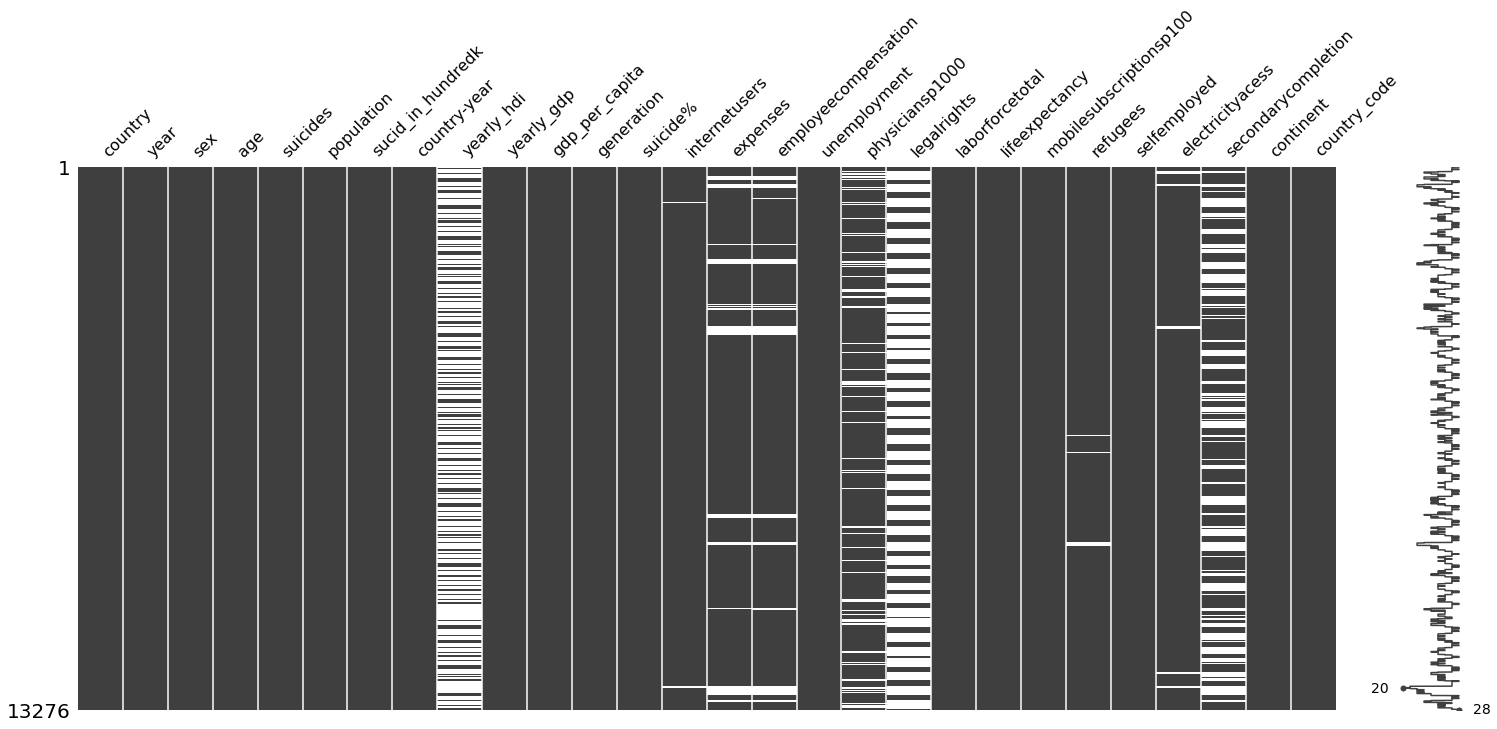

In [797]:
# Useful package for visualizing and understanding missing data
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missingness
msno.matrix(final)
plt.show()

In [798]:
# Isolate missing and complete values aside
missing_hdi = final[final['yearly_hdi'].isna()]
complete_hdi = final[~final['yearly_hdi'].isna()]


In [799]:
missing_hdi.describe()

,year,suicides,population,sucid_in_hundredk,yearly_hdi,yearly_gdp,gdp_per_capita,suicide%,internetusers,expenses,...,unemployment,physiciansp1000,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptionsp100,refugees,selfemployed,electricityacess,secondarycompletion
count,9124.000000,9124.000000,9.124000e+03,9124.000000,0.0,9.124000e+03,9124.000000,9124.000000,9040.000000,8296.000000,...,9124.000000,7636.000000,3472.000000,9.124000e+03,9124.000000,9124.000000,9028.000000,9124.000000,8872.000000,5776.000000
mean,1999.316528,398.808417,2.675820e+06,14.931306,NaN,4.909546e+11,18993.097545,0.014931,18.721017,18.301408,...,5.227582,1.629947,0.013825,1.046639e+07,46.821799,36.334094,11155.957909,2.075908,60.227276,36.322351
std,7.765484,1254.037008,3.868640e+06,19.189067,NaN,8.412982e+11,17235.005103,0.019189,26.212149,17.180872,...,5.712548,1.717781,0.234786,1.872559e+07,36.850168,45.008328,48186.144109,4.528243,48.284712,44.883387
min,1985.000000,0.000000,4.400000e+03,0.000000,NaN,1.201313e+09,357.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993.000000,19.000000,4.304650e+05,2.390000,NaN,6.408769e+10,4312.000000,0.002387,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1999.000000,84.000000,1.018677e+06,8.380000,NaN,1.868300e+11,14544.000000,0.008382,3.148128,18.537786,...,4.274000,1.369900,0.000000,2.598586e+06,71.531000,7.696397,16.000000,0.469000,99.146201,0.000000
75%,2006.000000,276.000000,3.394224e+06,20.047500,NaN,4.550400e+11,28390.000000,0.020044,31.288396,34.929966,...,8.522000,3.200000,0.000000,1.125782e+07,78.150000,77.601842,743.000000,1.827000,100.000000,88.745550
max,2016.000000,22338.000000,2.846186e+07,177.610000,NaN,5.231380e+12,103431.000000,0.177609,93.000000,51.714662,...,33.473000,6.615700,4.000000,9.542172e+07,82.931463,165.661017,551744.000000,30.332001,100.000000,111.923260


In [800]:
complete_hdi.describe()

,year,suicides,population,sucid_in_hundredk,yearly_hdi,yearly_gdp,gdp_per_capita,suicide%,internetusers,expenses,...,unemployment,physiciansp1000,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptionsp100,refugees,selfemployed,electricityacess,secondarycompletion
count,4152.000000,4152.000000,4.152000e+03,4152.000000,4152.000000,4.152000e+03,4152.000000,4152.000000,4152.000000,3828.000000,...,4152.000000,3576.000000,1476.000000,4.152000e+03,4152.000000,4152.000000,4116.000000,4152.000000,4092.000000,2544.000000
mean,2004.635838,280.768064,2.507378e+06,13.047040,0.809491,6.447662e+11,25921.404624,0.013047,34.527586,24.022747,...,6.570720,2.218488,1.552846,1.146377e+07,57.485604,63.618038,9803.329446,2.337049,73.531550,54.537283
std,9.206240,641.986372,3.593958e+06,16.328986,0.087930,1.040453e+12,22564.488900,0.016329,33.744718,17.267104,...,5.987349,1.756878,2.777742,1.796641e+07,33.839620,55.607686,49867.723843,4.623033,43.461442,46.433452
min,1985.000000,0.000000,4.500000e+03,0.000000,0.539000,1.468317e+09,426.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1995.000000,18.000000,4.587632e+05,2.210000,0.746000,9.789109e+10,7612.000000,0.002206,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,78.000000,1.008634e+06,7.555000,0.826500,2.580655e+11,19912.000000,0.007554,28.319131,28.512193,...,6.476000,2.597950,0.000000,4.302448e+06,75.581927,72.935384,50.000000,0.660500,100.000000,85.312630
75%,2012.000000,248.250000,3.272471e+06,17.870000,0.884000,5.631100e+11,41184.000000,0.017873,67.089999,38.248283,...,9.146000,3.499100,3.000000,1.752937e+07,80.163415,114.601429,856.000000,2.201000,100.000000,96.620390
max,2014.000000,8073.000000,2.797110e+07,165.960000,0.944000,6.203210e+12,109804.000000,0.165961,96.546800,62.186783,...,30.229000,7.334100,12.000000,9.899009e+07,83.331951,172.121808,396717.000000,31.235001,100.000000,116.367400


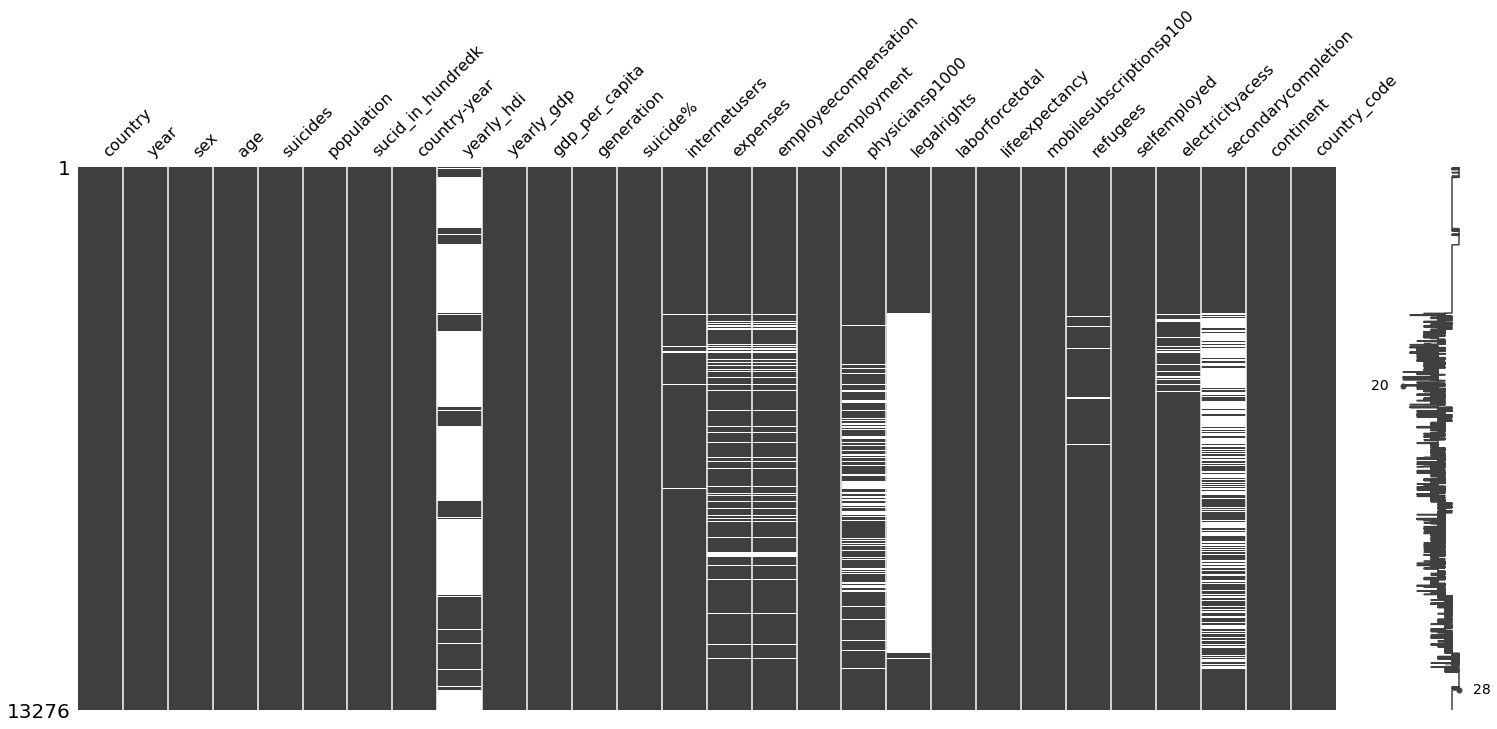

In [801]:
sorted_final = final.sort_values(by = 'year')
msno.matrix(sorted_final)
plt.show()

In [802]:
#checking percentage of missing values
percent_missing = final.isnull().sum() * 100 / len(final)
missing_value_final = pd.DataFrame({'percent_missing': percent_missing})
missing_value_final.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_final

,percent_missing
yearly_hdi,68.725520
legalrights,62.729738
secondarycompletion,37.330521
physiciansp1000,15.546851
employeecompensation,9.038867
expenses,8.677312
electricityacess,2.350105
refugees,0.994275
internetusers,0.632721
continent,0.000000


in above case yearly_hdi,secondarycompletion and legalrights are missing more than 30%. I will be removing these columns as I am unable to replace the majority of data for them.

In [803]:
final.drop('yearly_hdi', axis=1, inplace=True)
final.drop('secondarycompletion', axis=1, inplace=True)
final.drop('legalrights', axis=1, inplace=True)

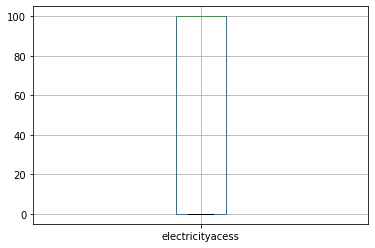

In [804]:
stud_bplt = final.boxplot(column = 'electricityacess')


stud_bplt.plot()


plt.show()

In [820]:
final.internetusers.fillna(final.internetusers	. min(), inplace=True)
final.employeecompensation.fillna(final.employeecompensation.mean(), inplace=True)
final.electricityacess.fillna(final.electricityacess.mean(), inplace=True)
final.refugees.fillna(final.refugees.mean(), inplace=True)
final.expenses.fillna(final.expenses.mean(), inplace=True)
final.physiciansp1000.fillna(final.physiciansp1000.mean(), inplace=True)

In [821]:
percent_missing = final.isnull().sum() * 100 / len(final)
missing_value_final = pd.DataFrame({'percent_missing': percent_missing})
missing_value_final.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_final

,percent_missing
country,0.0
expenses,0.0
continent,0.0
electricityacess,0.0
selfemployed,0.0
refugees,0.0
mobilesubscriptionsp100,0.0
lifeexpectancy,0.0
laborforcetotal,0.0
physiciansp1000,0.0


In [808]:
df.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [809]:
second_data.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [810]:
final.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [811]:
final.country.unique()

['Argentina', 'Armenia', 'Australia', 'Austria', 'Belgium', ..., 'Sweden', 'Switzerland', 'Thailand', 'Turkmenistan', 'Ukraine']
Length: 39
Categories (39, object): ['Argentina', 'Armenia', 'Australia', 'Austria', ..., 'Switzerland', 'Thailand', 'Turkmenistan', 'Ukraine']

In [822]:
final.head(2)

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,...,unemployment,physiciansp1000,laborforcetotal,lifeexpectancy,mobilesubscriptionsp100,refugees,selfemployed,electricityacess,continent,country_code
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,8.841667e+10,3264,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,Americas,ARG


In [824]:
final.groupby(['year', 'age','country']).size()

year  age          country     
1985  15-24 years  Argentina       2
                   Armenia         0
                   Australia       2
                   Austria         2
                   Belgium         2
                                  ..
2016  75+ years    Sweden          2
                   Switzerland     0
                   Thailand        2
                   Turkmenistan    0
                   Ukraine         0
Length: 7488, dtype: int64

In [825]:
final.shape

(13276, 25)

In [828]:
final.to_csv('E:\\Dessertation\\desertion_dkit_msc_2022_sep\\output.csv',mode = 'w', index=False)
# outputting data to run models in live server